
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Make a Synthetic Nonlinear Facies-based Dataset

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Import Required Packages

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Set Up

Let's make an empty DataFrame, set the random seed number.

In [16]:
columns = ['Por','Perm','Facies']
df_final = pd.DataFrame(columns = columns)
seed = 73073
np.random.seed(seed = seed)
cmap = plt.cm.inferno

#### First Facies

We generate a facies porosity and permeability relationship with the following workflow:
    
* sample the bivariate Gaussian distribution

* impose nonlinearity in permeability through a quadratic expression

* min/max normalize the result

* plot the result

* append to the DataFrame

The follow parameters may be set:
    
* **facies** - the facies number as an interger

* **mean**, **stdev** - the univariate parameters for the Gaussian bivariate 

* **corr** - correlation coefficient for the Gaussian bivariate

* **a**, **b**, **c** - the quadrative parameters

* **nsample** - number of samples for this facies

,Por,Perm,Facies
0,23.311638,1187.778477,1
1,21.208123,1155.562494,1
2,18.350419,1045.901501,1
3,25.053697,1197.902032,1
4,21.259112,1137.369924,1


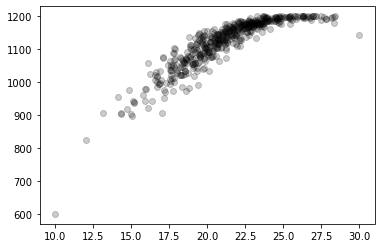

In [17]:
# facies parameters
facies = 1
mean = [12,5]
stdev = [4.5,2.9]
corr = 0.95
a = -1.5; b = 30; c = 100

tmin = [10.0,600.0]
tmax = [30.0,1200.0]

cov = np.array([stdev[0]*stdev[0],corr*stdev[0]*stdev[1], corr*stdev[0]*stdev[1], stdev[1]*stdev[1]]); cov = cov.reshape((2,2))
nsample = 500

# sample from the bivariate Gaussian distribution
bgaus = np.random.multivariate_normal(mean, cov, size = nsample)

# impose nonlinearity through a quadratic transform of the permeability 
bgaus[:,1] = a * bgaus[:,1] * bgaus[:,1] + b * bgaus[:,1] + c 

# correct to the target min and max
bgaus = (bgaus - np.amin(bgaus, axis = 0))/(np.amax(bgaus, axis = 0)-np.amin(bgaus, axis = 0))*(np.array(tmax)-np.array(tmin))+np.array(tmin)

# plot the result
plt.scatter(bgaus[:,0],bgaus[:,1],alpha = 0.2,c = 'black')

# append to the DataFrame
df1 = pd.DataFrame({'Por':bgaus[:,0],'Perm':bgaus[:,1],'Facies':np.full(nsample,facies)})
df1.head()

### Second Facies

Now repeat for the second facies.

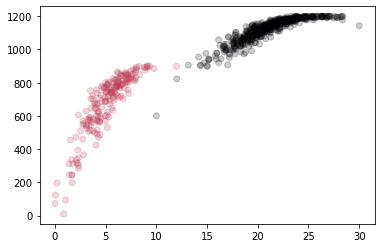

In [18]:
# facies parameters
facies = 3
mean = [12,5]
stdev = [4.5,2.9]
corr = 0.9
a = -1.3; b = 30; c = 100

tmin = [0.0,10.0]
tmax = [12.0,900.0]

cov = np.array([stdev[0]*stdev[0],corr*stdev[0]*stdev[1], corr*stdev[0]*stdev[1], stdev[1]*stdev[1]]); cov = cov.reshape((2,2))
nsample = 200

# sample from the bivariate Gaussian distribution
bgaus = np.random.multivariate_normal(mean, cov, size = nsample)
bgaus[:,1] = a * bgaus[:,1] * bgaus[:,1] + b * bgaus[:,1] + c 

# correct to the target min and max
bgaus = (bgaus - np.amin(bgaus, axis = 0))/(np.amax(bgaus, axis = 0)-np.amin(bgaus, axis = 0))*(np.array(tmax)-np.array(tmin))+np.array(tmin)

# append to the DataFrame
df2 = pd.DataFrame({'Por':bgaus[:,0],'Perm':bgaus[:,1],'Facies':np.full(nsample,facies)})
df_final = df2.append(df1)

# plot the result
plt.scatter(df_final['Por'],df_final['Perm'],c = df_final['Facies'],alpha = 0.2,cmap = cmap,vmin = 1, vmax = 5)

#### Third Facies

Now repeat for the third facies.

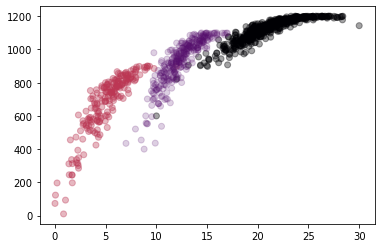

In [19]:
# facies parameters
facies = 2
mean = [12,5]
stdev = [4.5,2.9]
corr = 0.9
a = -1.3; b = 30; c = 100

tmin = [7.0,400.0]
tmax = [17.0,1100.0]

cov = np.array([stdev[0]*stdev[0],corr*stdev[0]*stdev[1], corr*stdev[0]*stdev[1], stdev[1]*stdev[1]]); cov = cov.reshape((2,2))
nsample = 300

# sample from the bivariate Gaussian distribution
bgaus = np.random.multivariate_normal(mean, cov, size = nsample)
bgaus[:,1] = a * bgaus[:,1] * bgaus[:,1] + b * bgaus[:,1] + c 

# correct to the target min and max
bgaus = (bgaus - np.amin(bgaus, axis = 0))/(np.amax(bgaus, axis = 0)-np.amin(bgaus, axis = 0))*(np.array(tmax)-np.array(tmin))+np.array(tmin)

# append to the DataFrame
df3 = pd.DataFrame({'Por':bgaus[:,0],'Perm':bgaus[:,1],'Facies':np.full(nsample,facies)})
df_final = df_final.append(df1).append(df2).append(df3)

# plot the result
plt.scatter(df_final['Por'],df_final['Perm'],c = df_final['Facies'],alpha = 0.2,cmap = cmap,vmin = 1, vmax = 5)

#### Plot the Final Dataset

Now let's make a good plot of the final dataset.

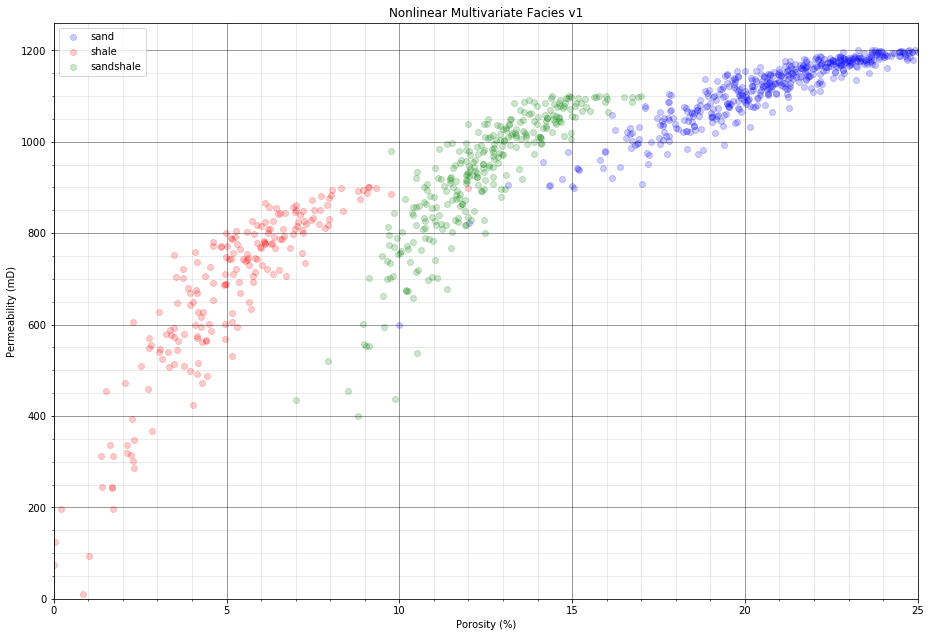

In [20]:
# plot the result
plt.subplot(111)
plt.scatter(df1['Por'],df1['Perm'],color = 'blue',alpha = 0.2,cmap = cmap,vmin = 1, vmax = 4,label = 'sand')
plt.scatter(df2['Por'],df2['Perm'],color = 'red',alpha = 0.2,cmap = cmap,vmin = 1, vmax = 4,label = 'shale')
plt.scatter(df3['Por'],df3['Perm'],color = 'green',alpha = 0.2,cmap = cmap,vmin = 1, vmax = 4,label = 'sandshale')
plt.xlim(0,25)
plt.ylim(0.1200)

ax = plt.gca()
ax.set_xticks(np.arange(0, 26, 5))
ax.set_xticks(np.arange(0, 26, 1), minor=True)
ax.set_yticks(np.arange(0, 1201, 200))
ax.set_yticks(np.arange(0, 1201, 50), minor=True)

plt.grid(which = 'both',color = 'black',alpha = 0.2)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)'); plt.title('Nonlinear Multivariate Facies v1')
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.2)


#### Write to .csv File

Now let's write the synthetic data to a .csv file.

In [22]:
df_final.to_csv('nonlinear_facies_v1.csv')

#### Comments

It is helpful to be able to general reasonable/realistic dataset. I hope that this is helpful.

I'm always happy to discuss,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin